## Explotaratory Data Analysis: ENIF 2021 Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pandas_profiling as pp
from sklearn.utils import resample
import os

In [2]:
ENIF_2021=pd.read_stata('Data/ENIF2021_final.dta')

In [3]:
ENIF_2021.shape

(13554, 467)

In [4]:
os.getcwd()

'/home/juanpalms/Desktop/ozmo'

In [9]:
import os

os.getcwd()

'/home/juanpalms/Desktop/ozmo'

### Limpieza de datos

In [5]:
columns_headers=list(ENIF_2021.columns.values)
print(columns_headers)

['folio', 'viv_sel', 'hogar', 'n_ren', 'p3_1_1', 'p3_1_2', 'p3_2', 'p3_3', 'p3_4', 'p3_5', 'p3_6', 'p3_7', 'p3_8a', 'p3_8b', 'p3_9', 'p3_10', 'p3_11', 'p4_1', 'p4_2_1', 'p4_2_2', 'p4_2_3', 'p4_2_4', 'p4_2_5', 'p4_3', 'p4_4_1', 'p4_4_2', 'p4_4_3', 'p4_4_4', 'p4_4_5', 'p4_4_6', 'p4_4_7', 'p4_5', 'p4_6_1', 'p4_6_2', 'p4_6_3', 'p4_6_4', 'p4_6_5', 'p4_6_6', 'p4_7_1', 'p4_7_2', 'p4_7_3', 'p4_8_1', 'p4_8_2', 'p4_8_3', 'p4_8_4', 'p4_8_5', 'p4_8_6', 'p4_9_1', 'p4_9_2', 'p4_9_3', 'p4_9_4', 'p4_10', 'p5_1_1', 'p5_1_2', 'p5_1_3', 'p5_1_4', 'p5_1_5', 'p5_1_6', 'p5_2_1', 'p5_2_2', 'p5_2_3', 'p5_2_4', 'p5_2_5', 'p5_2_6', 'p5_2_7', 'p5_2_8', 'p5_2_9', 'p5_3', 'p5_4_1', 'p5_5_1', 'p5_6_1', 'p5_7_1', 'p5_4_2', 'p5_5_2', 'p5_6_2', 'p5_7_2', 'p5_4_3', 'p5_5_3', 'p5_6_3', 'p5_7_3', 'p5_4_4', 'p5_5_4', 'p5_6_4', 'p5_7_4', 'p5_4_5', 'p5_5_5', 'p5_6_5', 'p5_7_5', 'p5_4_6', 'p5_5_6', 'p5_7_6', 'p5_4_7', 'p5_5_7', 'p5_7_7', 'p5_4_8', 'p5_5_8', 'p5_6_8', 'p5_7_8', 'p5_4_9', 'p5_5_9', 'p5_6_9', 'p5_7_9', 'p5_8_01

In [6]:
def SUMA_AMAI(x,y,z,w,k,u):
    suma=0
    #Numero de banos
    if (x==1):
        suma+=24
    elif (x>1):
        suma+=47
    #numero de carros
    if (y==1):
        suma+=22
    elif (y>1):
        suma+=43
    #Internet fijo
    if (z==1):
        suma+=32
    #Numero de cuartos
    if (w==1):
        suma+=15
    elif(w==2):
        suma+=31
    elif(w==3):
        suma+=46
    elif(w>3):
        suma+=61
    #numero de trabajadores
    if(k==1):
        suma+=8
    elif(k==2):
        suma+=16
    elif(k==3):
        suma+=24
    elif(k>3):
        suma+=32
    #Nivel de escolaridad
    if(u==1):
        suma+=6
    elif(u==2):
        suma+=11
    elif(u==3):
        suma+=18
    elif(u==4):
        suma+=23
    elif(u==5):
        suma+=27
    elif(u==6):
        suma+=27
    elif(u==7):
        suma+=27
    elif(u==8):
        suma+=59
    elif(u==9):
        suma+=85
    else:
        suma+=0
    return suma

In [7]:
ENIF_2021['Suma_AMAI'] = ENIF_2021.apply(lambda x: SUMA_AMAI(x['p0_3'],x['p0_4_1a'],x['p0_4_2a'],x['p2_8'],
                                                            x['p0_1'],x['niv']), axis=1)

In [8]:
ENIF_2021['Suma_AMAI'].describe()

count    13554.000000
mean       109.640696
std         48.025022
min          8.000000
25%         73.000000
50%        109.000000
75%        141.000000
max        285.000000
Name: Suma_AMAI, dtype: float64

In [9]:
def NSE_amai(x):
    if x<=47:
        return "E"
    elif (x>47) & (x<=94):
        return "D"
    elif (x>94) & (x<=115):
        return "D+"
    elif (x>115) & (x<=140):
        return "C-"
    elif (x>140) & (x<=167):
        return "C"
    elif (x>167) & (x<=201):
        return "C+"
    else:
        return "A/B"

In [1]:
Dict_NSE={"E":1,"D":2,"D+":3,"C-":4,"C":5,"C+":6,"A/B":7}

In [5]:
Dict_NSE["E"]

1

In [10]:
ENIF_2021['NSE_AMAI'] = ENIF_2021.apply(lambda x: NSE_amai(x['Suma_AMAI']), axis=1)

In [11]:
print (ENIF_2021['NSE_AMAI'].unique())

['D' 'C-' 'C+' 'C' 'D+' 'A/B' 'E']


In [7]:
ENIF_2021['ingresos_mensuales'].value_counts().sum()

NameError: name 'ENIF_2021' is not defined

In [13]:
print (ENIF_2021['niv_ingresos'].cat.categories)

Index(['Sin ingresos', 'Menor o igual a 5k', 'Entre 5k y 13k', 'Más de 13k'], dtype='object')


In [14]:
ENIF_2021['niv_ingresos'].value_counts()

Sin ingresos          5311
Entre 5k y 13k        3735
Menor o igual a 5k    3557
Más de 13k             951
Name: niv_ingresos, dtype: int64

In [15]:
ENIF_2021['sexo']=ENIF_2021['sexo'].replace([2,1],['Mujeres','Hombres'])

In [16]:
print (ENIF_2021['sexo'].unique()) #0==mujeres

['Mujeres' 'Hombres']


In [17]:
ENIF_2021['sexo'].value_counts()

Mujeres    7345
Hombres    6209
Name: sexo, dtype: int64

In [18]:
print (ENIF_2021['tloc'].unique())

[1 2 3 4]


In [19]:
def localidades(x):
    if x==1:
        return "100k> habitantes"
    elif x==2:
        return "15k a 100k habitantes"
    elif x==3:
        return "2.5k a 15k habitantes"
    else:
        return "2.5< habitantes"


In [20]:
ENIF_2021['Localidad'] = ENIF_2021.apply(lambda x: localidades(x['tloc']), axis=1)

In [21]:
ENIF_2021['Localidad'].value_counts()

100k> habitantes         6584
2.5< habitantes          3148
15k a 100k habitantes    1981
2.5k a 15k habitantes    1841
Name: Localidad, dtype: int64

In [22]:
#Division por edades
grupos_edad=[
    (ENIF_2021['edad']<35),
    (ENIF_2021['edad']>=35)]

labels_edad=['Edad objetivo(Menos de 34 años)','Más de 34 años']
ENIF_2021['Grupos_edad']=np.select(grupos_edad,labels_edad)

#ENIF_2021['Grupos_edad'].isna().sum()
#No missing data in Grupos_edad

In [23]:
ENIF_2021['Grupos_edad'].value_counts()

Más de 34 años                     8827
Edad objetivo(Menos de 34 años)    4727
Name: Grupos_edad, dtype: int64

In [24]:
print (ENIF_2021['formal'].unique())

['No trabaja', 'Formal', 'Sin clasificar', 'Informal']
Categories (4, object): ['Sin clasificar' < 'No trabaja' < 'Formal' < 'Informal']


In [25]:
print (ENIF_2021['cond_laboral'].unique())

['No trabaja', 'Trabaja']
Categories (2, object): ['No trabaja' < 'Trabaja']


In [26]:
ENIF_2021['p3_5'].describe()

count    13554.000000
mean         2.663273
std          2.369523
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max          8.000000
Name: p3_5, dtype: float64

In [27]:
def actividad_eco(x,y):
    if x==1:
        return "Trabajador@"
    elif x==2:
        return "Trabajador@"
    elif x==4:
        return "Estudiante"
    elif x==5: 
        return "Trabajador@ del hogar"
    elif x==6: 
        return "Jubilad@"
    elif x==7:
        return "Incapacitad@"
    elif (y==1):
        return "Trabajo negocio"
    elif (y==2):
        return "Vendedor@ o productor@"
    elif  (y==3):
        return "Trabajo en el campo"
    elif (y==4):
        return "Trabajo domestico remunerado"
    elif (y==5):
        return "Aprendiz"

    else:
        return "Desemplead@" 

In [28]:
ENIF_2021['Actividad_economica'] = ENIF_2021.apply(lambda x: actividad_eco(x['p3_5'],x['p3_6']), axis=1)

In [29]:
def rol(x,y):
    if (x=="Trabajador@")& (y==1):
        return "Negocio familiar"
    elif (x=="Trabajador@") & (y==2):
        return "Emplead@/Obrer@"
    elif (x=="Trabajador@") & (y==3):
        return "Jornaler@/Peon"
    elif (x=="Trabajador@") & (y==4):
        return "Trabaja independiente"
    elif (x=="Trabajador@") & (y==5):
        return "Patron/Empleador@"
    elif (x=="Estudiante")& (y==1):
        return "Negocio familiar"
    elif (x=="Estudiante") & (y==2):
        return "Emplead@/Obrer@"
    elif (x=="Estudiante") & (y==3):
        return "Jornaler@/Peon"
    elif (x=="Estudiante") & (y==4):
        return "Trabaja independiente"
    elif (x=="Trabajador@ del hogar") & (y==5):
        return "Patron/Empleador@"
    elif (x=="Trabajador@ del hogar")& (y==1):
        return "Negocio familiar"
    elif (x=="Trabajador@ del hogar") & (y==2):
        return "Emplead@/Obrer@"
    elif (x=="Trabajador@ del hogar") & (y==3):
        return "Jornaler@/Peon"
    elif (x=="Trabajador@ del hogar") & (y==4):
        return "Trabaja independiente"
    elif (x=="Trabajador@ del hogar") & (y==5):
        return "Patron/Empleador@"
    elif (x=="Jubilad@")& (y==1):
        return "Negocio familiar"
    elif (x=="Jubilad@") & (y==2):
        return "Emplead@/Obrer@"
    elif (x=="Jubilad@") & (y==3):
        return "Jornaler@/Peon"
    elif (x=="Jubilad@") & (y==4):
        return "Trabaja independiente"
    elif (x=="Jubilad@") & (y==5):
        return "Patron/Empleador@"
    elif (x=="Incapacitad@")& (y==1):
        return "Negocio familiar"
    elif (x=="Incapacitad@") & (y==2):
        return "Emplead@/Obrer@"
    elif (x=="Incapacitad@") & (y==3):
        return "Jornaler@/Peon"
    elif (x=="Incapacitad@") & (y==4):
        return "Trabaja independiente"
    elif (x=="Incapacitad@") & (y==5):
        return "Patron/Empleador@"
    elif (x=="Aprendiz")& (y==1):
        return "Negocio familiar"
    elif (x=="Aprendiz") & (y==2):
        return "Emplead@/Obrer@"
    elif (x=="Aprendiz") & (y==3):
        return "Jornaler@/Peon"
    elif (x=="Aprendiz") & (y==4):
        return "Trabaja independiente"
    elif (x=="Aprendiz") & (y==5):
        return "Patron/Empleador@"
    else:
        return x

In [30]:
ENIF_2021['ROL_eco'] = ENIF_2021.apply(lambda x: rol(x['Actividad_economica'],x['p3_7']), axis=1)

In [31]:
ENIF_2021['ROL_eco'].value_counts().sort_index()

Desemplead@                      911
Emplead@/Obrer@                 5479
Estudiante                       294
Incapacitad@                     156
Jornaler@/Peon                   570
Jubilad@                         603
Negocio familiar                 610
Patron/Empleador@                167
Trabaja independiente           2530
Trabajador@ del hogar           2026
Trabajo domestico remunerado      33
Trabajo en el campo               52
Trabajo negocio                   59
Vendedor@ o productor@            64
Name: ROL_eco, dtype: int64

In [32]:
edad_35=(ENIF_2021["edad"] <= 35)
edad_35_mas=(ENIF_2021["edad"] >35)
cuenta=(ENIF_2021["cuenta"]=="Con cuenta")

In [33]:
below_36 = ENIF_2021[edad_35]
from35_andup= ENIF_2021[edad_35_mas]

In [34]:
menores_36=below_36['fac_ele'].sum()
mayores_36=from35_andup['fac_ele'].sum()
print(menores_36,mayores_36)

36075130 54253190


In [35]:
ENIF_2021[edad_35 & cuenta].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719 entries, 1 to 13545
Columns: 473 entries, folio to ROL_eco
dtypes: category(54), float32(15), float64(268), int16(5), int32(1), int64(1), int8(123), object(6)
memory usage: 6.4+ MB


### ANALISIS PREELIMINAR DE VARIABLES

#### Variables sociodemograficas grupo de interes

Analisis exploratorio de las variables sociodemograficas del grupo objetivo:
Personas de 18 a 34 anios

In [36]:
Dems=['NSE_AMAI','Grupos_edad','edad','niv_ingresos','Localidad','sexo','formal','ROL_eco']

In [37]:
ENIF_Demos=ENIF_2021.copy()
ENIF_Demos=ENIF_Demos[Dems]

In [38]:
ENIF_Demos

,NSE_AMAI,Grupos_edad,edad,niv_ingresos,Localidad,sexo,formal,ROL_eco
0,D,Más de 34 años,83,Sin ingresos,100k> habitantes,Mujeres,No trabaja,Desemplead@
1,C-,Edad objetivo(Menos de 34 años),20,Menor o igual a 5k,100k> habitantes,Mujeres,Formal,Emplead@/Obrer@
2,C+,Edad objetivo(Menos de 34 años),29,Más de 13k,100k> habitantes,Hombres,Formal,Emplead@/Obrer@
3,C,Más de 34 años,56,Sin ingresos,100k> habitantes,Mujeres,Sin clasificar,Trabajo negocio
4,C-,Más de 34 años,37,Entre 5k y 13k,100k> habitantes,Mujeres,Formal,Emplead@/Obrer@
...,...,...,...,...,...,...,...,...
13549,E,Edad objetivo(Menos de 34 años),21,Sin ingresos,2.5< habitantes,Mujeres,No trabaja,Trabajador@ del hogar
13550,D,Edad objetivo(Menos de 34 años),22,Entre 5k y 13k,2.5< habitantes,Mujeres,Informal,Emplead@/Obrer@
13551,D,Más de 34 años,45,Sin ingresos,2.5< habitantes,Hombres,Sin clasificar,Negocio familiar
13552,D,Más de 34 años,63,Menor o igual a 5k,2.5< habitantes,Hombres,Informal,Jornaler@/Peon


In [39]:
def Eco_sim(x):
    if x=="Emplead@/Obrer@" :
        return "Emplead@/Obrer@"
    elif x=="Trabaja independiente":
        return "Independiente"
    elif x=="Trabajador@ del hogar":
        return "Trabajador@ del hogar"
    elif x=='Desemplead@ ':
        return "Desemplead@ "
    elif x=='Negocio familiar':
        return "Negocio familiar"
    elif x=='Jubilad@':
        return "Jubilad@"
    else:
        return "Otros"

In [40]:
def Base_piramide(x):
    if x=="D" :
        return "NSE_Objetivo"
    elif x=="D+":
        return "NSE_Objetivo"
    elif x=="C-":
        return "NSE_Objetivo"
    else:
        return "Otros NSE"

In [41]:
ENIF_Demos.rename(columns = {'ROL_eco_s':'Ocupacion'}, inplace = True)

## Plots

In [42]:
import seaborn as sns

In [43]:
#https://coolors.co/gradient-palette/ee3a3a-ffffff?number=6

paleta_ozmo=['#ee3a3a','#454545','#444ee6','#01f1ba']
paleta_ozmo2=['#ee3a3a','#454545','#444ee6','#01f1ba','#F58E8E','#959595']
paleta_bin_ozmo=['#ee3a3a','#454545']
paleta_red_deg=['#EE3A3A','#F05656','#F37272','#F58E8E','#F8ABAB','#FAC7C7','#FDE3E3']
paleta_gray_deg=['#454545', '#606060', '#7A7A7A', '#959595', '#AFAFAF', '#CACACA', '#E4E4E4']
paleta_blue_deg=["#444EE6","#5F67EA","#7981ED","#949AF1","#AFB3F4","#CACCF8","#E4E6FB"]
paleta_green_deg=["#01F1BA","#2BF3C6","#56F6D1","#80F8DD","#AAFAE8","#D5FDF4","#FFFFFF"]


paleta_red_deg_4=['#EE3A3A','#F37272','#F8ABAB','#FDE3E3']
paleta_gray_deg_4=['#454545', '#7A7A7A',  '#AFAFAF', '#E4E4E4']
paleta_blue_deg_4=["#444EE6","#7981ED","#AFB3F4","#E4E6FB"]
paleta_green_deg_4=["#01F1BA","#56F6D1","#AAFAE8","#D5FDF4"]



In [44]:
(ENIF_Demos['sexo'].value_counts()/ENIF_Demos['sexo'].count())*100

Mujeres    54.190645
Hombres    45.809355
Name: sexo, dtype: float64

In [45]:
(ENIF_Demos['sexo'].value_counts())

Mujeres    7345
Hombres    6209
Name: sexo, dtype: int64

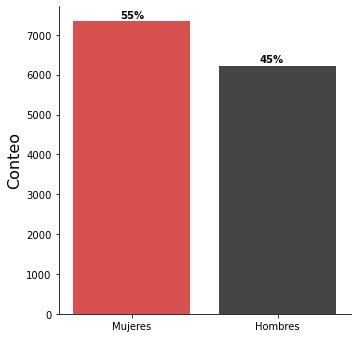

<Figure size 2520x216 with 0 Axes>

In [47]:
graf_sex=sns.catplot(x='sexo',data=ENIF_Demos, kind='count',palette=paleta_bin_ozmo) 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('55%',
            xy=(120, 320), xycoords='figure points',weight="bold")
plt.annotate('45%',
            xy=(260, 276), xycoords='figure points',weight="bold")
graf_sex.fig.suptitle('');
plt.figure(figsize=(35, 3))
graf_sex.savefig('Results/Graphs/sexo.png')

In [48]:
(ENIF_Demos['Grupos_edad'].value_counts()/ENIF_Demos['Grupos_edad'].count())*100

Más de 34 años                     65.124686
Edad objetivo(Menos de 34 años)    34.875314
Name: Grupos_edad, dtype: float64

In [49]:
(ENIF_Demos['Grupos_edad'].value_counts())

Más de 34 años                     8827
Edad objetivo(Menos de 34 años)    4727
Name: Grupos_edad, dtype: int64

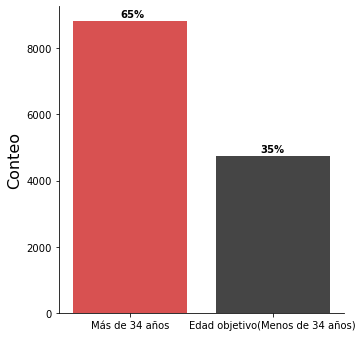

<Figure size 2520x216 with 0 Axes>

In [50]:
graf_age=sns.catplot(x='Grupos_edad',data=ENIF_Demos, kind='count',palette=paleta_bin_ozmo) 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('65%',
            xy=(120, 320), xycoords='figure points',weight="bold")
plt.annotate('35%',
            xy=(260, 185), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('');
plt.figure(figsize=(35, 3))
graf_age.savefig('Results/Graphs/edad.png')

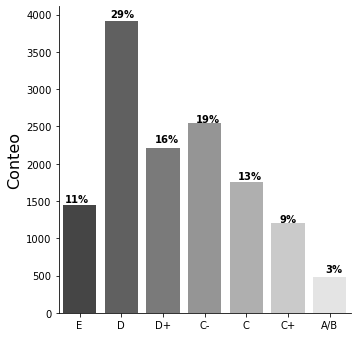

<Figure size 2520x216 with 0 Axes>

In [51]:
orden_amai=['E','D','D+', 'C-', 'C', 'C+',  'A/B' ]
graf_NSE=sns.catplot(x='NSE_AMAI',data=ENIF_Demos, kind='count',order=orden_amai,palette=paleta_gray_deg) 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('11%',
            xy=(65, 135), xycoords='figure points',weight="bold")
plt.annotate('29%',
            xy=(110, 320), xycoords='figure points',weight="bold")
plt.annotate('16%',
            xy=(155, 195), xycoords='figure points',weight="bold")
plt.annotate('19%',
            xy=(196, 215), xycoords='figure points',weight="bold")
plt.annotate('13%',
            xy=(238, 158), xycoords='figure points',weight="bold")
plt.annotate('9%',
            xy=(280, 115), xycoords='figure points',weight="bold")
plt.annotate('3%',
            xy=(325, 65), xycoords='figure points',weight="bold")
graf_NSE.fig.suptitle('');
plt.figure(figsize=(35, 3))
graf_NSE.savefig('Results/Graphs/NSE.png');

In [52]:
(ENIF_Demos['NSE_AMAI'].value_counts())

D      3915
C-     2548
D+     2215
C      1759
E      1442
C+     1201
A/B     474
Name: NSE_AMAI, dtype: int64

In [53]:
(ENIF_Demos['NSE_AMAI'].value_counts()/ENIF_Demos['NSE_AMAI'].count())*100

D      28.884462
C-     18.798879
D+     16.342039
C      12.977719
E      10.638926
C+      8.860853
A/B     3.497123
Name: NSE_AMAI, dtype: float64

<Figure size 2520x3240 with 0 Axes>

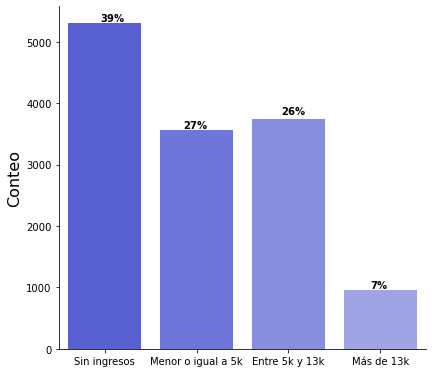

In [54]:
plt.figure(figsize=(35, 45))
#orden_amai=['E','D','D+', 'C-', 'C', 'C+',  'A/B' ]
graf_amai=sns.catplot(x='niv_ingresos',data=ENIF_Demos, kind='count',palette=paleta_blue_deg, height=5.5,
                      aspect=1.1) 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('39%',
            xy=(100, 352), xycoords='figure points',weight="bold")
plt.annotate('27%',
            xy=(183, 245), xycoords='figure points',weight="bold")
plt.annotate('26%',
            xy=(281, 259), xycoords='figure points',weight="bold")
plt.annotate('7%',
            xy=(370, 85), xycoords='figure points',weight="bold")


graf_amai.savefig('Results/Graphs/Ingresos.png');

In [55]:
(ENIF_Demos['niv_ingresos'].value_counts())

Sin ingresos          5311
Entre 5k y 13k        3735
Menor o igual a 5k    3557
Más de 13k             951
Name: niv_ingresos, dtype: int64

In [56]:
(ENIF_Demos['niv_ingresos'].value_counts()/ENIF_Demos['niv_ingresos'].count())*100

Sin ingresos          39.184005
Entre 5k y 13k        27.556441
Menor o igual a 5k    26.243175
Más de 13k             7.016379
Name: niv_ingresos, dtype: float64

<Figure size 2520x3240 with 0 Axes>

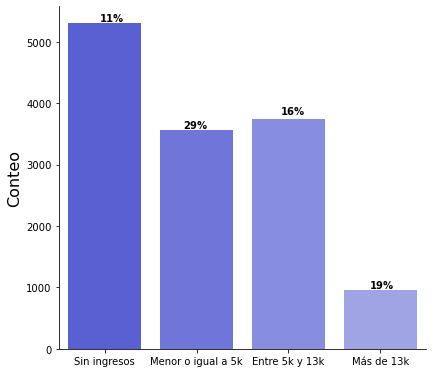

In [57]:
plt.figure(figsize=(35, 45))
#orden_amai=['E','D','D+', 'C-', 'C', 'C+',  'A/B' ]
graf_amai=sns.catplot(x='niv_ingresos',data=ENIF_Demos, kind='count',palette=paleta_blue_deg, height=5.5,
                      aspect=1.1) 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('11%',
            xy=(100, 352), xycoords='figure points',weight="bold")
plt.annotate('29%',
            xy=(183, 245), xycoords='figure points',weight="bold")
plt.annotate('16%',
            xy=(281, 259), xycoords='figure points',weight="bold")
plt.annotate('19%',
            xy=(370, 85), xycoords='figure points',weight="bold")


graf_amai.savefig('Results/Graphs/Ingresos.png');

In [58]:
ENIF_Demos['ROL_eco_s'] = ENIF_Demos.apply(lambda x: Eco_sim(x['ROL_eco']), axis=1)

In [59]:
(ENIF_Demos['ROL_eco_s'].value_counts()/ENIF_Demos['ROL_eco_s'].count())*100

Emplead@/Obrer@          40.423491
Independiente            18.666076
Otros                    17.013428
Trabajador@ del hogar    14.947617
Negocio familiar          4.500516
Jubilad@                  4.448871
Name: ROL_eco_s, dtype: float64

In [60]:
(ENIF_Demos['ROL_eco'].value_counts()/ENIF_Demos['ROL_eco'].count())*100

Emplead@/Obrer@                 40.423491
Trabaja independiente           18.666076
Trabajador@ del hogar           14.947617
Desemplead@                      6.721263
Negocio familiar                 4.500516
Jubilad@                         4.448871
Jornaler@/Peon                   4.205401
Estudiante                       2.169101
Patron/Empleador@                1.232109
Incapacitad@                     1.150952
Vendedor@ o productor@           0.472185
Trabajo negocio                  0.435296
Trabajo en el campo              0.383651
Trabajo domestico remunerado     0.243471
Name: ROL_eco, dtype: float64

<Figure size 2520x3240 with 0 Axes>

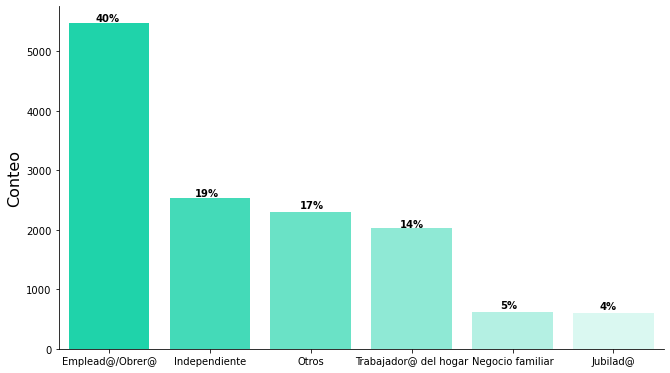

In [61]:
plt.figure(figsize=(35, 45))
orden_rol=['Emplead@/Obrer@','Independiente','Otros', 'Trabajador@ del hogar', 'Negocio familiar', 'Jubilad@']
graf_rol=sns.catplot(x='ROL_eco_s',data=ENIF_Demos, kind='count',palette=paleta_green_deg, height=5.5,
                      aspect=1.7, order=orden_rol) 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('40%',
            xy=(95, 352), xycoords='figure points',weight="bold")
plt.annotate('19%',
            xy=(195, 177), xycoords='figure points',weight="bold")
plt.annotate('17%',
            xy=(300, 165), xycoords='figure points',weight="bold")
plt.annotate('14%',
            xy=(400, 146), xycoords='figure points',weight="bold")
plt.annotate('5%',
            xy=(500, 65), xycoords='figure points',weight="bold")
plt.annotate('4%',
            xy=(600, 64), xycoords='figure points',weight="bold")

graf_rol.savefig('Results/Graphs/ROL.png');

In [62]:
(ENIF_Demos['ROL_eco'].value_counts())

Emplead@/Obrer@                 5479
Trabaja independiente           2530
Trabajador@ del hogar           2026
Desemplead@                      911
Negocio familiar                 610
Jubilad@                         603
Jornaler@/Peon                   570
Estudiante                       294
Patron/Empleador@                167
Incapacitad@                     156
Vendedor@ o productor@            64
Trabajo negocio                   59
Trabajo en el campo               52
Trabajo domestico remunerado      33
Name: ROL_eco, dtype: int64

<Figure size 2520x3240 with 0 Axes>

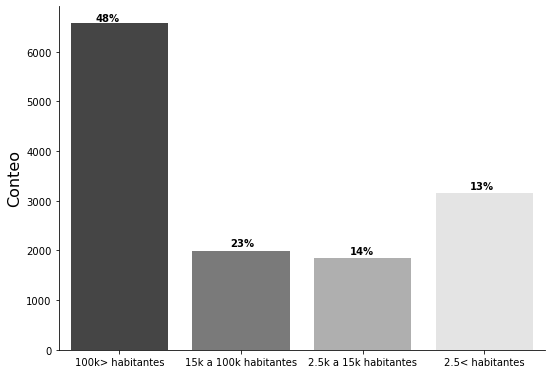

In [63]:
plt.figure(figsize=(35, 45))
#orden_rol=['Emplead@/Obrer@','Independiente','Otros', 'Trabajador@ del hogar', 'Negocio familiar', 'Jubilad@']
graf_rol=sns.catplot(x='Localidad',data=ENIF_Demos, kind='count',palette=paleta_gray_deg_4, height=5.5,
                      aspect=1.4) 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('48%',
            xy=(95, 353), xycoords='figure points',weight="bold")
plt.annotate('23%',
            xy=(230, 128), xycoords='figure points',weight="bold")
plt.annotate('14%',
            xy=(350, 120), xycoords='figure points',weight="bold")
plt.annotate('13%',
            xy=(470, 185), xycoords='figure points',weight="bold")

graf_rol.savefig('Results/Graphs/Localidad.png');

In [64]:
(ENIF_Demos['Localidad'].value_counts()/ENIF_Demos['Localidad'].count())*100

100k> habitantes         48.576066
2.5< habitantes          23.225616
15k a 100k habitantes    14.615612
2.5k a 15k habitantes    13.582706
Name: Localidad, dtype: float64

In [65]:
ENIF_Demos['Base_piramide'] = ENIF_Demos.apply(lambda x: Base_piramide(x['NSE_AMAI']), axis=1)

In [66]:
(ENIF_Demos['Base_piramide'].value_counts())

NSE_Objetivo    8678
Otros NSE       4876
Name: Base_piramide, dtype: int64

In [67]:
(ENIF_Demos['NSE_AMAI'].value_counts())

D      3915
C-     2548
D+     2215
C      1759
E      1442
C+     1201
A/B     474
Name: NSE_AMAI, dtype: int64

In [68]:
def Pb_Objetivo(x,y):
    if (x<=34) & (y=="NSE_Objetivo"):
        return "Juventudes BdP"
    else:
        return "Poblacion restante"

In [69]:
ENIF_Demos

,NSE_AMAI,Grupos_edad,edad,niv_ingresos,Localidad,sexo,formal,ROL_eco,ROL_eco_s,Base_piramide
0,D,Más de 34 años,83,Sin ingresos,100k> habitantes,Mujeres,No trabaja,Desemplead@,Otros,NSE_Objetivo
1,C-,Edad objetivo(Menos de 34 años),20,Menor o igual a 5k,100k> habitantes,Mujeres,Formal,Emplead@/Obrer@,Emplead@/Obrer@,NSE_Objetivo
2,C+,Edad objetivo(Menos de 34 años),29,Más de 13k,100k> habitantes,Hombres,Formal,Emplead@/Obrer@,Emplead@/Obrer@,Otros NSE
3,C,Más de 34 años,56,Sin ingresos,100k> habitantes,Mujeres,Sin clasificar,Trabajo negocio,Otros,Otros NSE
4,C-,Más de 34 años,37,Entre 5k y 13k,100k> habitantes,Mujeres,Formal,Emplead@/Obrer@,Emplead@/Obrer@,NSE_Objetivo
...,...,...,...,...,...,...,...,...,...,...
13549,E,Edad objetivo(Menos de 34 años),21,Sin ingresos,2.5< habitantes,Mujeres,No trabaja,Trabajador@ del hogar,Trabajador@ del hogar,Otros NSE
13550,D,Edad objetivo(Menos de 34 años),22,Entre 5k y 13k,2.5< habitantes,Mujeres,Informal,Emplead@/Obrer@,Emplead@/Obrer@,NSE_Objetivo
13551,D,Más de 34 años,45,Sin ingresos,2.5< habitantes,Hombres,Sin clasificar,Negocio familiar,Negocio familiar,NSE_Objetivo
13552,D,Más de 34 años,63,Menor o igual a 5k,2.5< habitantes,Hombres,Informal,Jornaler@/Peon,Otros,NSE_Objetivo


In [70]:
ENIF_Demos['Poblacion de Interes'] = ENIF_Demos.apply(lambda x: Pb_Objetivo(x['edad'],x['Base_piramide']), axis=1)

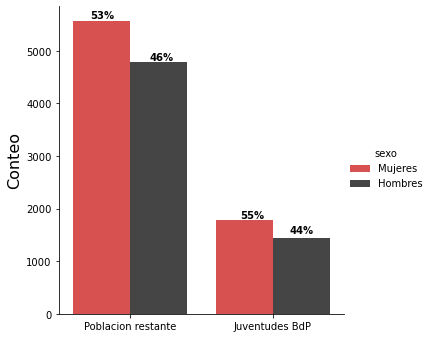

<Figure size 2520x216 with 0 Axes>

In [71]:
graf_sex=sns.catplot(x='Poblacion de Interes',data=ENIF_Demos, kind='count',palette=paleta_bin_ozmo, hue='sexo') 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('53%',
            xy=(90, 320), xycoords='figure points',weight="bold")
plt.annotate('46%',
            xy=(150, 278), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('')
plt.annotate('55%',
            xy=(240, 120), xycoords='figure points',weight="bold")
plt.annotate('44%',
            xy=(290, 105), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('');
plt.figure(figsize=(35, 3))
graf_sex.savefig('Results/Graphs/sexo_pp.png')

In [72]:
Juventudes_df=ENIF_Demos.loc[ENIF_Demos['Poblacion de Interes']=='Juventudes BdP']
Pobrest_df=ENIF_Demos.loc[ENIF_Demos['Poblacion de Interes']=='Poblacion restante']

In [73]:
Juventudes_df['sexo'].value_counts()

Mujeres    1780
Hombres    1432
Name: sexo, dtype: int64

In [74]:
(Juventudes_df['sexo'].value_counts()/Juventudes_df['sexo'].count())*100

Mujeres    55.417186
Hombres    44.582814
Name: sexo, dtype: float64

In [75]:
(Pobrest_df['sexo'].value_counts()/Pobrest_df['sexo'].count())*100

Mujeres    53.809708
Hombres    46.190292
Name: sexo, dtype: float64

In [76]:
ENIF_Demos.rename(columns = {'niv_ingresos':'Nivel de ingresos'}, inplace = True)

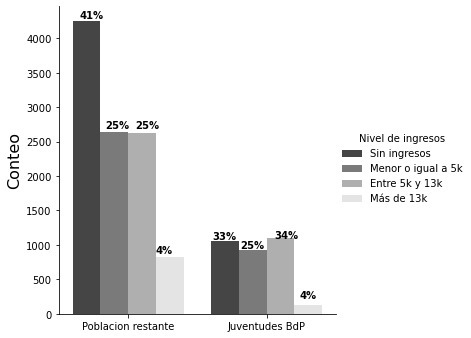

<Figure size 2520x216 with 0 Axes>

In [79]:
graf_sex=sns.catplot(x='Poblacion de Interes',data=ENIF_Demos, kind='count',palette=paleta_gray_deg_4, hue='Nivel de ingresos') 
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('41%',
            xy=(80, 320), xycoords='figure points',weight="bold")
plt.annotate('25%',
            xy=(105, 210), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('')
plt.annotate('25%',
            xy=(135, 210), xycoords='figure points',weight="bold")
plt.annotate('4%',
            xy=(155, 85), xycoords='figure points',weight="bold")
plt.annotate('33%',
            xy=(212, 99), xycoords='figure points',weight="bold")
plt.annotate('25%',
            xy=(240, 90), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('')
plt.annotate('34%',
            xy=(274, 100), xycoords='figure points',weight="bold")
plt.annotate('4%',
            xy=(300, 40), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('')
plt.figure(figsize=(35, 3))
graf_sex.savefig('Results/Graphs/ingreso_pp.png')

In [600]:
(Juventudes_df['Nivel de ingresos'].value_counts()/Juventudes_df['Nivel de ingresos'].count())*100

Entre 5k y 13k        34.339975
Sin ingresos          33.001245
Menor o igual a 5k    28.704857
Más de 13k             3.953923
Name: Nivel de ingresos, dtype: float64

In [601]:
(Pobrest_df['Nivel de ingresos'].value_counts()/Pobrest_df['Nivel de ingresos'].count())*100

Sin ingresos          41.104235
Menor o igual a 5k    25.478631
Entre 5k y 13k        25.449623
Más de 13k             7.967511
Name: Nivel de ingresos, dtype: float64

In [602]:
Juventudes_df['Nivel de ingresos'].value_counts()

Entre 5k y 13k        1103
Sin ingresos          1060
Menor o igual a 5k     922
Más de 13k             127
Name: Nivel de ingresos, dtype: int64

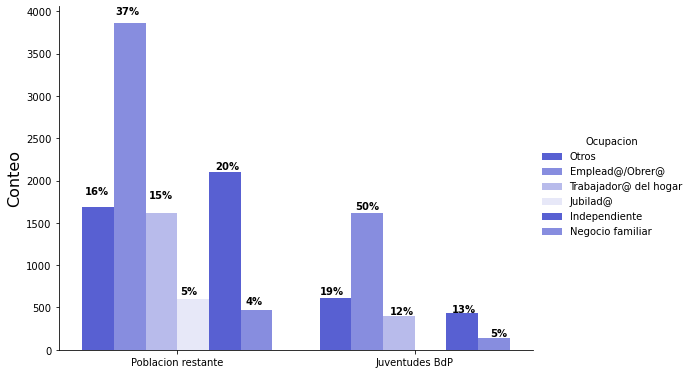

<Figure size 2520x216 with 0 Axes>

In [674]:
orden_rol=['Emplead@/Obrer@','Independiente','Otros', 'Trabajador@ del hogar', 'Negocio familiar', 'Jubilad@']
graf_sex=sns.catplot(x='Poblacion de Interes',data=ENIF_Demos, kind='count',palette=paleta_blue_deg_4 ,
                     hue='Ocupacion', height=5.5,
                      aspect=1.4)
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('16%',
            xy=(85, 180), xycoords='figure points',weight="bold")
plt.annotate('37%',
            xy=(115, 360), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('')
plt.annotate('15%',
            xy=(149, 176), xycoords='figure points',weight="bold")
plt.annotate('5%',
            xy=(180, 80), xycoords='figure points',weight="bold")
plt.annotate('20%',
            xy=(215, 205), xycoords='figure points',weight="bold")
plt.annotate('4%',
            xy=(245, 70), xycoords='figure points',weight="bold")
plt.annotate('19%',
            xy=(320, 80), xycoords='figure points',weight="bold")
plt.annotate('50%',
            xy=(355, 165), xycoords='figure points',weight="bold")

plt.annotate('12%',
            xy=(390, 60), xycoords='figure points',weight="bold")

plt.annotate('13%',
            xy=(452, 62), xycoords='figure points',weight="bold")

plt.annotate('5%',
            xy=(490, 38), xycoords='figure points',weight="bold")

graf_age.fig.suptitle('')
plt.figure(figsize=(35, 3))
graf_sex.savefig('Results/Graphs/ocupacion_pp.png')

In [646]:
(Juventudes_df['ROL_eco'].value_counts()/Juventudes_df['ROL_eco'].count())*100

Emplead@/Obrer@                 50.249066
Trabaja independiente           13.449564
Trabajador@ del hogar           12.577833
Estudiante                       6.537983
Desemplead@                      6.102117
Negocio familiar                 4.514321
Jornaler@/Peon                   3.455791
Patron/Empleador@                0.933998
Trabajo negocio                  0.871731
Vendedor@ o productor@           0.529265
Trabajo domestico remunerado     0.435866
Trabajo en el campo              0.217933
Incapacitad@                     0.093400
Jubilad@                         0.031133
Name: ROL_eco, dtype: float64

In [637]:
(Pobrest_df['Ocupacion'].value_counts()/Pobrest_df['Ocupacion'].count())*100

Emplead@/Obrer@          37.371882
Independiente            20.286212
Otros                    16.341133
Trabajador@ del hogar    15.683620
Jubilad@                  5.820924
Negocio familiar          4.496229
Name: Ocupacion, dtype: float64

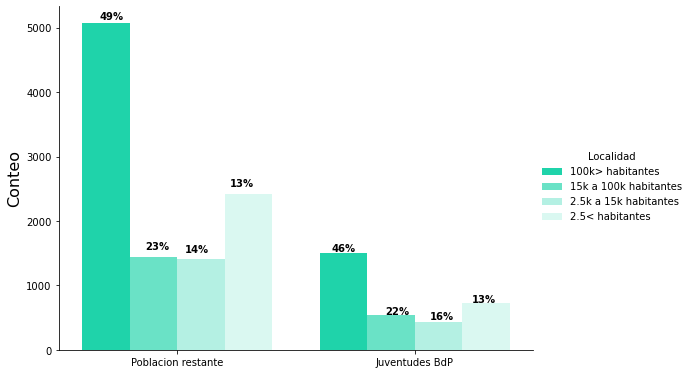

<Figure size 2520x216 with 0 Axes>

In [673]:
graf_sex=sns.catplot(x='Poblacion de Interes',data=ENIF_Demos, kind='count',palette=paleta_green_deg_4 ,
                     hue='Localidad', height=5.5,
                      aspect=1.4)
plt.xlabel('', fontsize=18)
plt.ylabel('Conteo', fontsize=16)
plt.annotate('49%',
            xy=(100, 355), xycoords='figure points',weight="bold")
plt.annotate('23%',
            xy=(145, 125), xycoords='figure points',weight="bold")
graf_age.fig.suptitle('')
plt.annotate('14%',
            xy=(185, 122), xycoords='figure points',weight="bold")
plt.annotate('13%',
            xy=(230, 188), xycoords='figure points',weight="bold")
plt.annotate('46%',
            xy=(331, 123), xycoords='figure points',weight="bold")
plt.annotate('22%',
            xy=(385, 60), xycoords='figure points',weight="bold")

plt.annotate('16%',
            xy=(430, 55), xycoords='figure points',weight="bold")

plt.annotate('13%',
            xy=(472, 72), xycoords='figure points',weight="bold")



graf_age.fig.suptitle('')
plt.figure(figsize=(35, 3))
graf_sex.savefig('Results/Graphs/localidad_pp.png')

In [666]:
(Pobrest_df['Localidad'].value_counts()/Pobrest_df['Localidad'].count())*100

100k> habitantes         49.081416
2.5< habitantes          23.438406
15k a 100k habitantes    13.914137
2.5k a 15k habitantes    13.566041
Name: Localidad, dtype: float64

In [667]:
(Juventudes_df['Localidad'].value_counts()/Juventudes_df['Localidad'].count())*100

100k> habitantes         46.948941
2.5< habitantes          22.540473
15k a 100k habitantes    16.874222
2.5k a 15k habitantes    13.636364
Name: Localidad, dtype: float64